# Minimal Example

As a minimal working example we use the model Iskhakov et al. (2017). The model features a lifecycle agent who, in each period, chooses whether to work or retire (a discrete choice) and how much to consume (a continuous choice), given their current assets and age. 

Working yields labor income but reduces leisure, while retirement offers leisure but no income. The agent faces stochastic survival and taste shocks over the discrete choices and seeks to maximize expected lifetime utility from consumption and leisure, subject to a standard intertemporal budget constraint.

This model shown in this guide corresponds to the template model "simplemodel".

In [46]:
import dcegm
import dcegm.toy_models as toy_models
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [47]:
# Load functions for the example model
model_functions = toy_models.load_example_model_functions("dcegm_paper")
params, model_specs, model_config = (
    toy_models.load_example_params_model_specs_and_config("dcegm_paper")
)

In [48]:
# The output contains the utility functions, state space functions, and  budget constraint required to set up the model
model_functions.keys()

dict_keys(['utility_functions', 'state_space_functions', 'utility_functions_final_period', 'budget_constraint'])

In [49]:
# Set up the model
model = dcegm.setup_model(
    model_config=model_config,
    model_specs=model_specs,
    **model_functions,
)

Update function for state space not given. Assume states only change with an increase of the period and lagged choice.
Sparsity condition not provided. Assume all states are valid.
Starting state space creation
State space created.

Starting state-choice space creation and child state mapping.
State, state-choice and child state mapping created.

Start creating batches for the model.
The batch size of the backwards induction is  3
Model setup complete.



In [50]:
# Solve the model
model_solved = model.solve(params)

/opt/anaconda3/envs/base2/lib/python3.13/site-packages/dcegm/backward_induction.py:236: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in full is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  value_solved = jnp.full(
/opt/anaconda3/envs/base2/lib/python3.13/site-packages/dcegm/backward_induction.py:241: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in full is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  policy_solved = jnp.full(
/opt/anaconda3/envs/base2/lib/python3.13/site-packages/dcegm/backward_induction.py:246: UserWarning: Explicitly requested dtype

In [51]:
# Simulate the model
n_agents = 1_000
states_initial = {
    "period": jnp.zeros(n_agents),
    "lagged_choice": jnp.zeros(n_agents),  # all agents start as workers
    "experience": jnp.ones(n_agents),
    "assets_begin_of_period": jnp.ones(n_agents) * 10,
}

In [52]:
simulation = model_solved.simulate(states_initial=states_initial, seed=42)

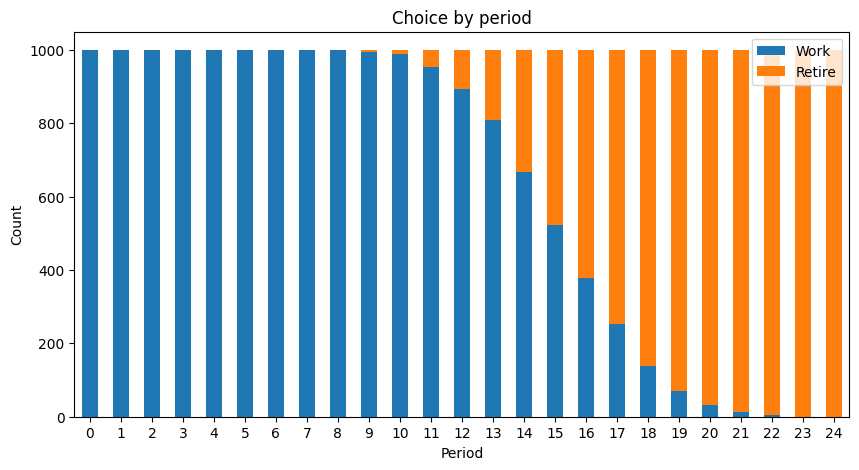

In [57]:
simulation.groupby("period").choice.value_counts().unstack().plot(
    kind="bar",
    stacked=True,
    title="Choice by period",
    xlabel="Period",
    ylabel="Count",
    figsize=(10, 5),
    rot=0,
)
# label choices work and retire in legend
plt.legend(["Work", "Retire"])